## **EV SEGMENTATION ANALYSIS**

### **Loading datasets & Initial Review**

In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading dataset - 1
evch = pd.read_csv('D:\Feynn labs - Internship\data\ev-charging-stations-india.csv')
evch.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [3]:
# reading dataset - 2
evtyp = pd.read_csv('D:\Feynn labs - Internship\data\ev_types_stations.csv')
evtyp.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [4]:
# reading dataset - 3
evmar = pd.read_excel('D:\Feynn labs - Internship\data\ev_market_india_data.xlsx')
evmar.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [5]:
# Initial Review
print('evch shape: ', evch.shape)
print('evtyp shape: ', evtyp.shape)
print('evmar shape: ', evmar.shape)

evch shape:  (1547, 7)
evtyp shape:  (24, 6)
evmar shape:  (103, 14)


In [6]:
# info of the columns in datasets
print('----------------EVCharging------------------')
print(evch.info())
print('----------------EVType------------------')
print(evtyp.info())
print('----------------EVMarket------------------')
print(evmar.info())

----------------EVCharging------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB
None
----------------EVType------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-

In [7]:
# statistical description of datasets
des1 = evch['state'].describe()
des2 = evtyp.describe()
des3 = evmar.describe()
display('----EVCharger----', des1, '----EVTypes----', des2, '----EVMarket----', des3)

'----EVCharger----'

count            1547
unique             60
top       Maharashtra
freq              259
Name: state, dtype: object

'----EVTypes----'

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


'----EVMarket----'

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


### **Graphical Visualization**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### *Statewise Availability of Charging Stations*
> **Observation:** Maharashtra has highest no. of stations, followed by Karnataka and Tamil Nadu. 

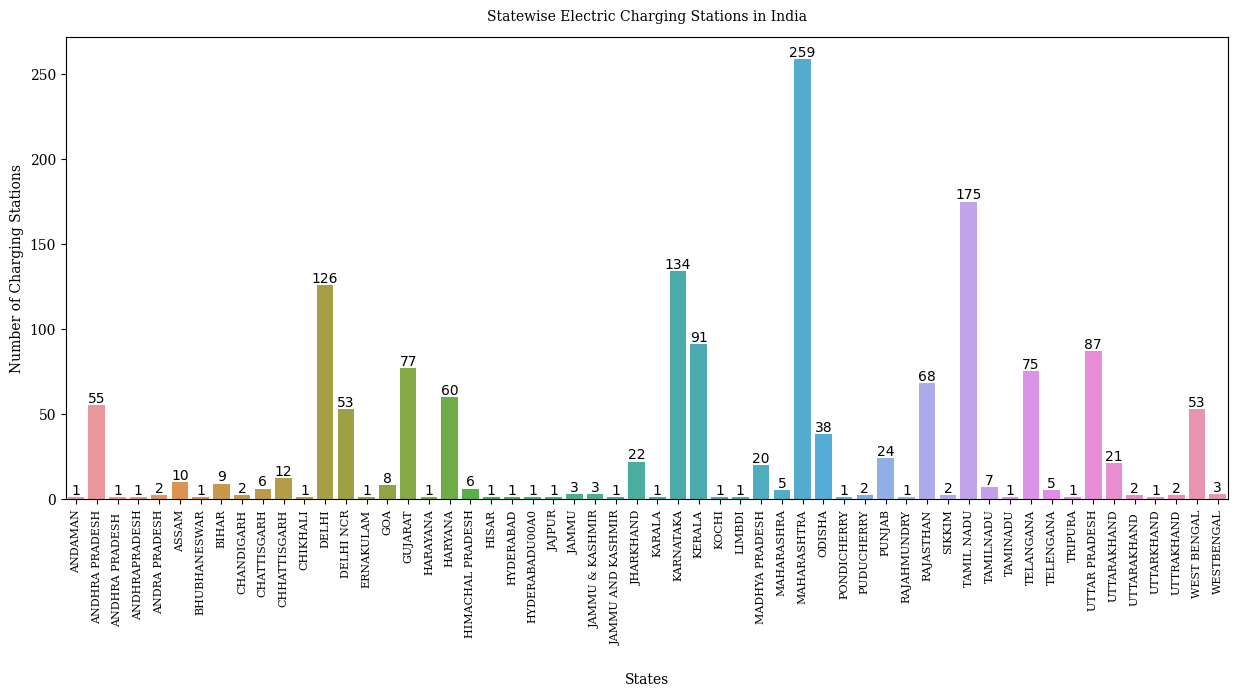

In [9]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x = evch['state'].str.upper().sort_values(), data=evch)
ax.bar_label(ax.containers[0], label_type='edge')
plt.ylabel('Number of Charging Stations', fontsize=10, family='serif')
plt.xlabel('States', family='serif', fontsize=10, labelpad=20)
plt.xticks(family='serif', rotation = 90, fontsize = 8)
plt.yticks(family='serif')
plt.title(label='Statewise Electric Charging Stations in India', weight=200, family='serif', size=10, pad=12)
plt.show()

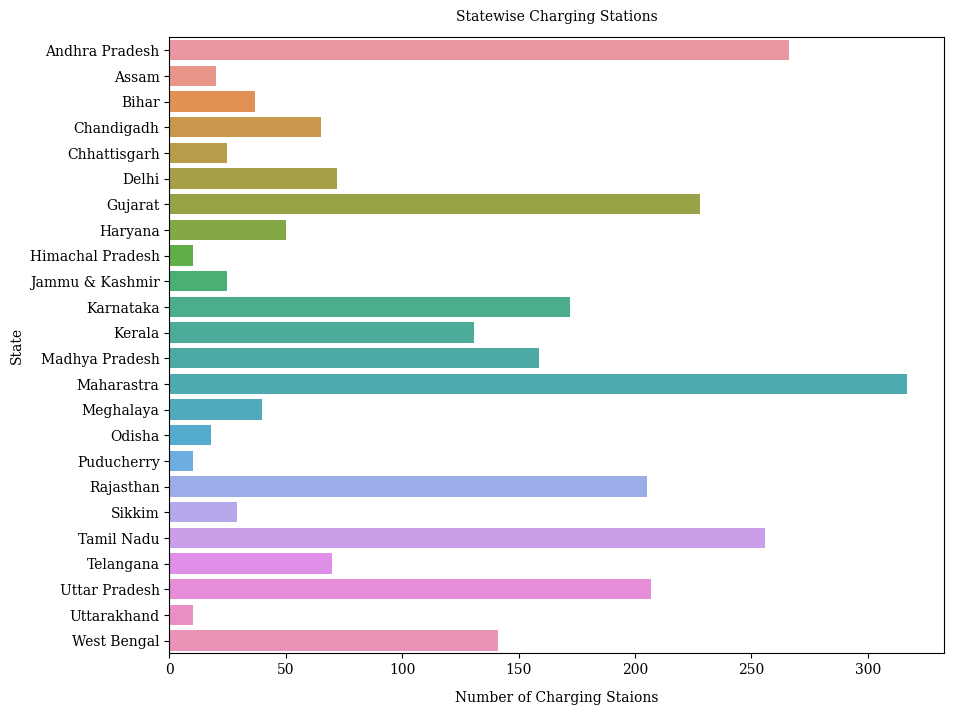

In [10]:
# 2 wheelers data visualization from dataset 2
plt.figure(figsize=(10, 8))
sns.barplot(data=evtyp, y=evtyp['Region'].sort_values(ascending=True), x='Chargers')
plt.ylabel('State', fontsize=10, family='serif')
plt.xlabel('Number of Charging Staions', family='serif', fontsize=10, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Charging Stations', weight=200, family='serif', size=10, pad=12)
plt.show()

#### *Trends in Types of EVs*

>**1. Observation:** Maharashtra, Gujarat, Tamilnadu, Karnataka and Andhra Pradesh uses majority of 2-wheelers EVs while Assam, Himachal Pradesh, Sikkim, J&K uses the least.

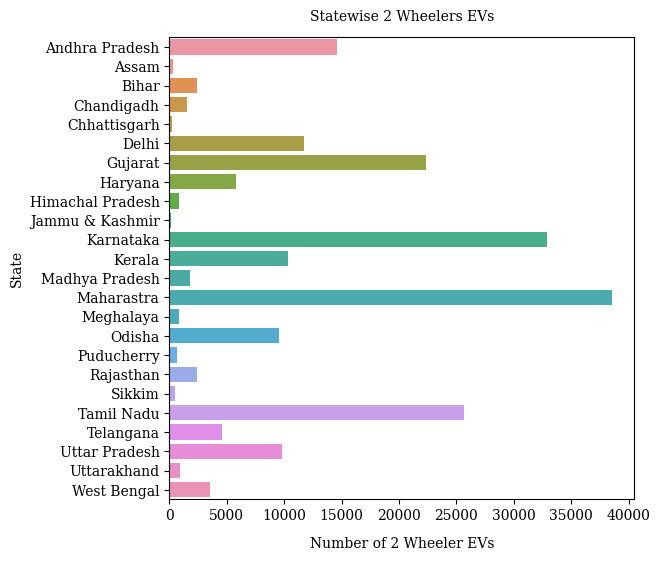

In [11]:
# 2 wheelers data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=evtyp, y=evtyp['Region'].sort_values(ascending=True), x='2W')
plt.ylabel('State', fontsize=10, family='serif')
plt.xlabel('Number of 2 Wheeler EVs', family='serif', fontsize=10, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise 2 Wheelers EVs', weight=200, family='serif', size=10, pad=12)
plt.show()

> **2. Observation:** Uttar Pradesh, Assam and Bihar uses EV 3-wheelers in more numbers, while the remaining states don't really do the same.

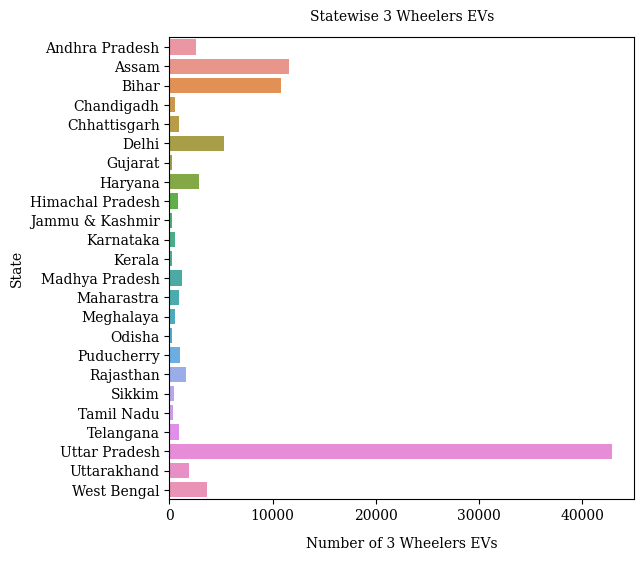

In [12]:
# 3 wheelers data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=evtyp, y=evtyp['Region'].sort_values(ascending=True), x='3W')
plt.ylabel('State', fontsize=10, family='serif')
plt.xlabel('Number of 3 Wheelers EVs', family='serif', fontsize=10, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise 3 Wheelers EVs', weight=200, family='serif', size=10, pad=12)
plt.show()

>**3. Observation:** Maharashtra, Delhi, Karnataka, Kerala and Andhra Pradhesh uses majority of 4-wheelers EVs while the remaining states use them in less number.

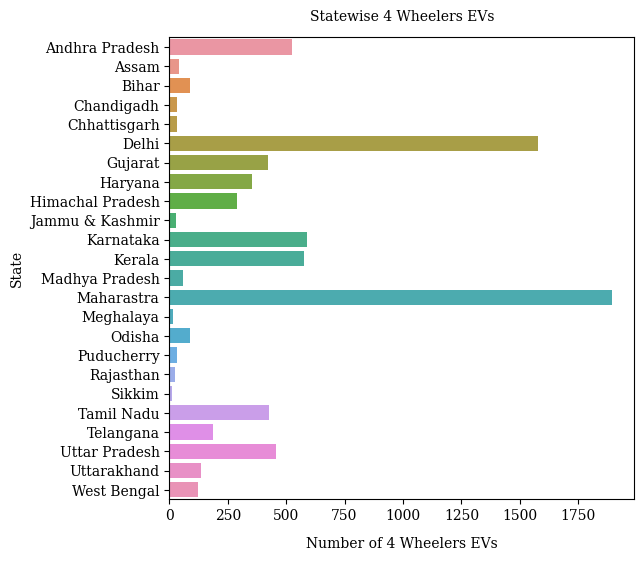

In [13]:
# 4 wheelers data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=evtyp, y=evtyp['Region'].sort_values(ascending=True), x='4W')
plt.ylabel('State', fontsize=10, family='serif')
plt.xlabel('Number of 4 Wheelers EVs', family='serif', fontsize=10, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise 4 Wheelers EVs', weight=200, family='serif', size=10, pad=12)
plt.show()

> **Observation:** UP, Maharashtra, Delhi, Karnataka, Bihar and Gujarat seems to be the only states that use Electric Buses, while other states do not.

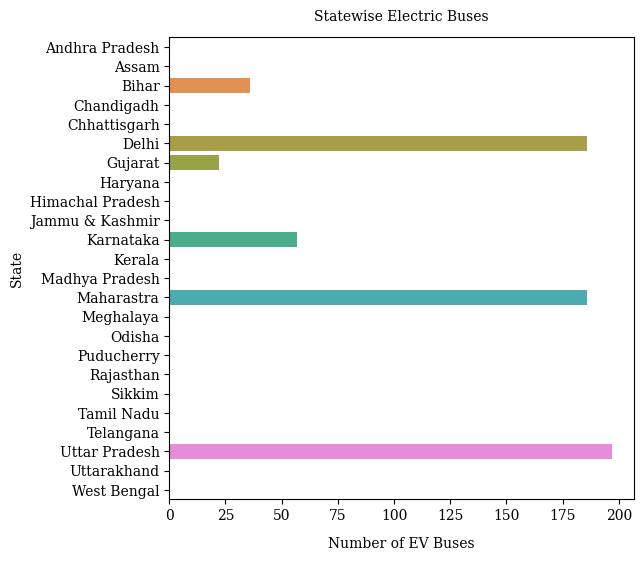

In [14]:
# Buses data visualization from dataset 2
plt.figure(figsize=(6, 6))
sns.barplot(data=evtyp, y=evtyp['Region'].sort_values(ascending=True), x='Bus')
plt.ylabel('State', fontsize=10, family='serif')
plt.xlabel('Number of EV Buses', family='serif', fontsize=10, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Buses', weight=200, family='serif', size=10, pad=12)
plt.show()

#### *Market Manufacturers of EVs*
> **Observation:** Tesla, Audi, Volkswagen, Nissan & Skoda manufactures highest no. of EVs models in the automobile market. 

<Figure size 600x600 with 0 Axes>

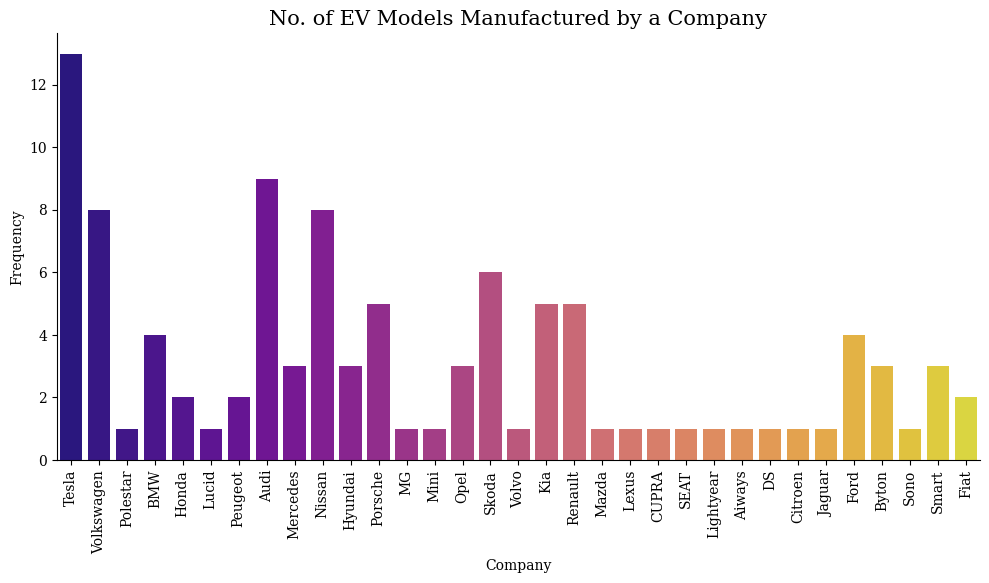

In [15]:
# brand-wise count of EV models
plt.figure(figsize=(6,6))
sns.catplot(data=evmar, x='Brand', kind='count', height=5, aspect=2, palette='plasma')
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Company',family='serif', size=10)
plt.ylabel('Frequency', family='serif', size=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('No. of EV Models Manufactured by a Company', family='serif', size=15)
plt.show()

#### *Body Types of EV in the market*
> **Observation:** Popular body types include SUV and Hatchback while Station and MPV are least manufactured by brands.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

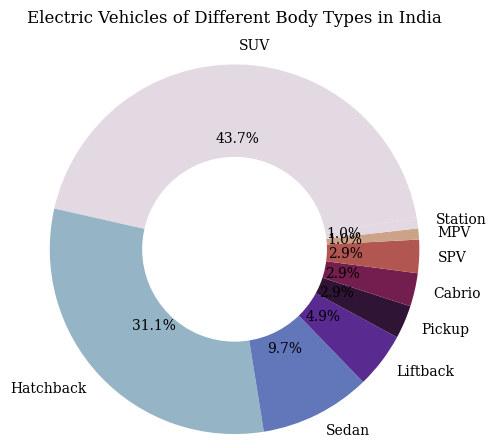

In [16]:
# body types in EVs
plt.figure(figsize=(3,3))
x = evmar['BodyStyle'].value_counts().plot.pie(radius=2, autopct='%.1f%%', cmap = 'twilight', startangle=10, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=12, pad=80)
plt.ylabel('')
plt.tight_layout

#### *Number of seats used in Indian EVs*
>**Observation:** 5 seater EVs are more in demand while 2 seater EVs are less.  

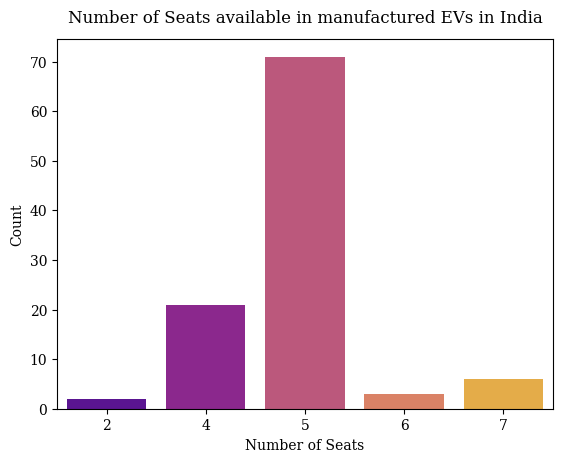

In [17]:
# No. of seats in EV
sns.countplot(data=evmar, x='Seats', palette='plasma')
plt.xlabel('Number of Seats', family='serif', size=10)
plt.ylabel('Count', family='serif', size=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Number of Seats available in manufactured EVs in India', family='serif', size=12, pad=12)
plt.show()

#### *Price range of EVs in the market*

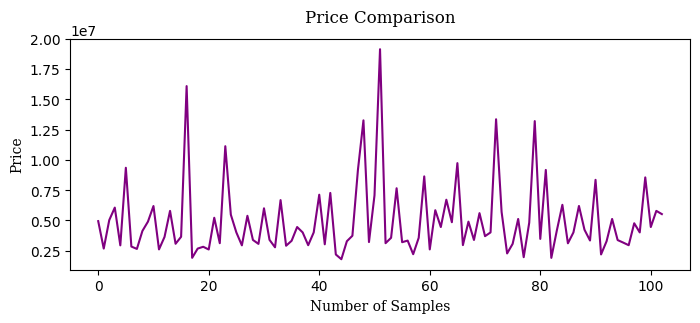

In [18]:
plt.figure(figsize=(8,3))
plt.plot(round(evmar['PriceEuro']*89), color='purple')
plt.xlabel('Number of Samples', family='serif', size=10)
plt.ylabel('Price', family='serif', size=10)
plt.title('Price Comparison', family='serif', size=12, pad=12);

#### *Acceleration Ranges of EVs*
> Observation: Renault, Seat & Smart models have high acceleration while Tesla, Lucid and Porsche have the lowest ranges.

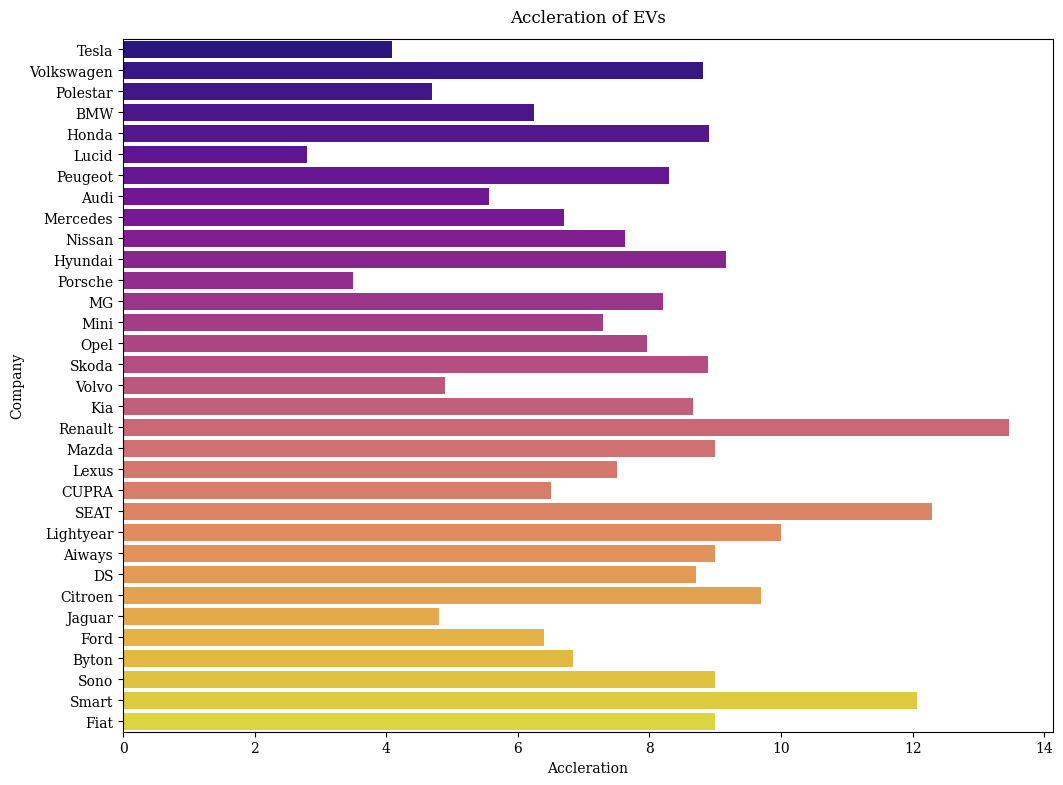

In [19]:

plt.figure(figsize=(12,9))
sns.barplot(data=evmar, y='Brand', x='AccelSec', errorbar=None, palette='plasma')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=10)
plt.ylabel('Company', family='serif', size=10)
plt.title(label='Accleration of EVs', family='serif', size=12, pad=12)
plt.show()

#### *Speed Ranges of EVs*
> Observation: Tesla, Lucid and Porsche are the top speed EVs while Renault, Smart and SEAT are the low speed models.

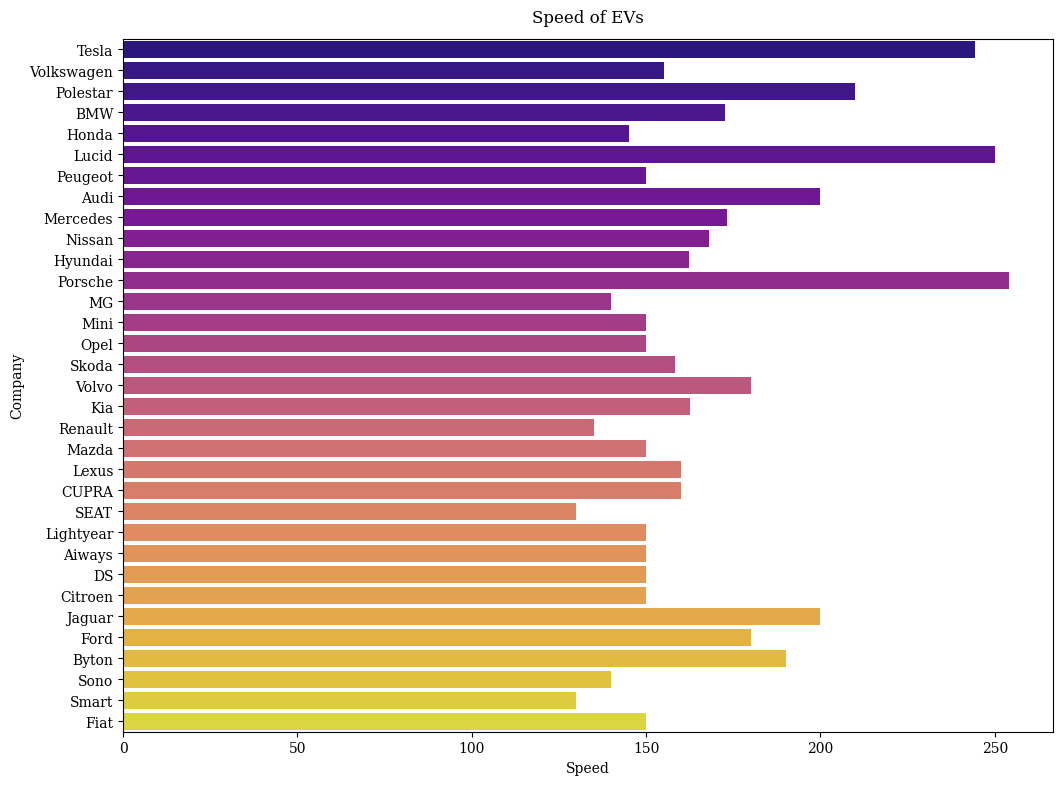

In [20]:
plt.figure(figsize=(12, 9))
sns.barplot(data=evmar, y='Brand', x='TopSpeed_KmH', errorbar=None, palette='plasma')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Speed', family='serif', size=10)
plt.ylabel('Company', family='serif', size=10)
plt.title(label='Speed of EVs', family='serif', size=12, pad=12)
plt.show()

#### *Analysis of EVs based on the range parameter*
> Observation: Lucid, Lightyear and Tesla models give the highest range in KM, and Smart the lowest.

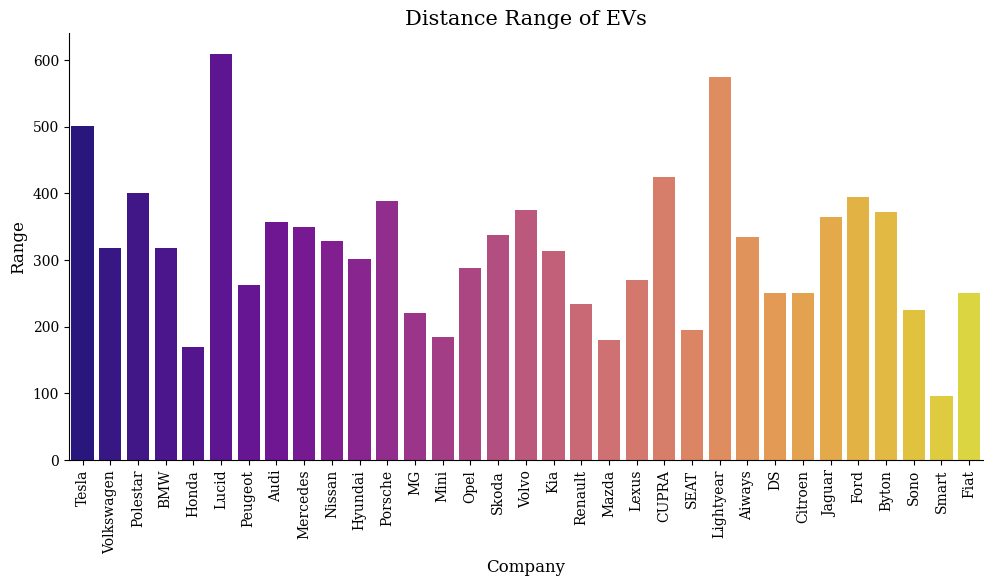

In [21]:
# Company-wise analysis of the ranges
sns.catplot(kind='bar', data=evmar, x='Brand', y='Range_Km', palette='plasma', errorbar=None, height=5, aspect=2)
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Company',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Distance Range of EVs', family='serif', size=15);

#### *Correlation between the features*
> Observation: 

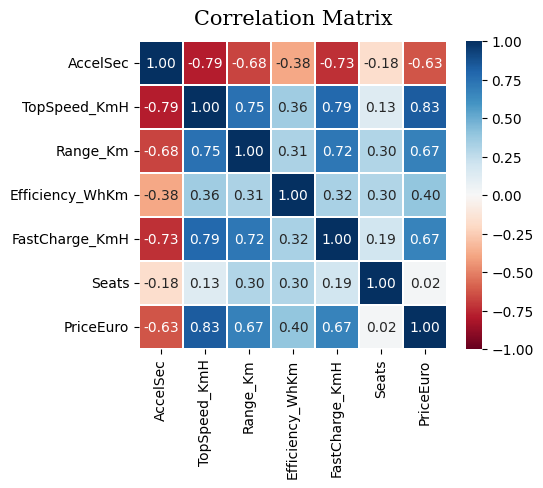

In [22]:
# plotting the correlation matrix from dataset 3
plt.figure(figsize=(5,4))
evm = evmar[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']]
sns.heatmap(data=evm.corr(), annot=True, vmin = -1, vmax = 1, cmap='RdBu', cbar=True, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

### **K-Means Clustering Model**

In [23]:
# A bit of preprocessing on the categorical features

# PowerTrain feature
evmar['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
evmar['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [24]:
# features needed for model building
X = evmar[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [25]:
# feature scaling
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Using Principle Component Analysis (PCA) to remove redundancy
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


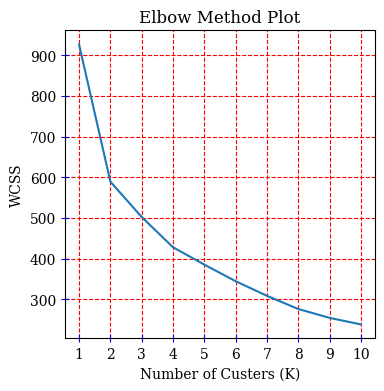

In [27]:
# plotting the results of Elbow
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(4,4))
plt.title('Elbow Method Plot', size=12, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='blue', grid_color='red', grid_linestyle='--')
plt.show()

In [28]:
# model training where k=4 from the plot above
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [29]:
# labels assigned to each data point
print(kmean.labels_)

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]


In [30]:
# size of clusters
pd.Series(kmean.labels_).value_counts()

1    39
2    32
3    19
0    13
Name: count, dtype: int64

In [31]:
# cluster labels added as new feature to the dataset 3
evmar['clusters'] = kmean.labels_

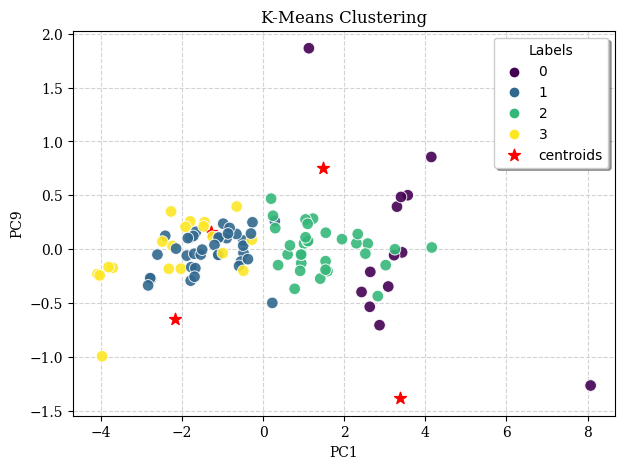

In [32]:
# Cluster points mapped
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=10)
plt.ylabel('PC9', family='serif', size=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering', family='serif', size=12)
plt.show()